# Pandas tutorial 

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing

## Series & Data frames 

In [2]:
# Series 
values = [10, 20, 30, 40, 50]
series = pd.Series(values, index =['a', 'b', 'c', 'd', 'a'])

print(series)
series.loc['a']
# Data Frame 
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'age': [25, 30, 35, 40],
    'job': ['Engineer', 'Doctor', 'Artist', 'Teacher']
})
df = df.set_index('name')

a    10
b    20
c    30
d    40
a    50
dtype: int64


In [3]:
df

,age,job
name,,
Alice,25,Engineer
Bob,30,Doctor
Charlie,35,Artist
David,40,Teacher


In [4]:
df1 = pd.DataFrame({
    'a': [1, 2, 3]   
},index=[0,1,2])

df2 = pd.DataFrame({
    'a':[10, 20, 30],
},index=[1,3,0])
# Adding two DataFrames with different indices they are aligned by index
# The result will have NaN for missing values in the index
df1+df2

,a
0,31.0
1,12.0
2,NaN
3,NaN


# Import & Export data

In [5]:
df = df.reset_index()

In [6]:
df.to_csv('mydata.csv', index = None)   #Gets rid of index column 
pd.read_csv('mydata.csv',index_col=0)  #First column is actually already the index column (avoids double index)

,age,job
name,,
Alice,25,Engineer
Bob,30,Doctor
Charlie,35,Artist
David,40,Teacher


# Data exploration functions 

In [7]:
#import the wanted dataset into a data frame 
df = fetch_california_housing(as_frame=True).frame
pd.options.display.max_columns = 50  #Set the maximum visible columns 
df.head()   #Gives first five rows 
df.tail(10)   #Give last N rows
df.sample(5)   #Gives N random sample from dataframe 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
12575,3.4083,36.0,5.432990,0.989691,832.0,2.859107,38.53,-121.42,0.718
3078,6.2885,6.0,6.909449,1.102362,664.0,2.614173,35.47,-118.92,2.164
18802,4.0132,14.0,6.273279,1.050607,1447.0,2.929150,40.64,-122.08,1.412
14438,2.2880,19.0,3.703777,0.988072,868.0,1.725646,32.80,-117.24,2.100
16456,2.4949,44.0,5.318284,1.088036,1043.0,2.354402,38.12,-121.27,1.080


In [8]:
list(df.columns)    #Gives a list of column names 

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# Statistical Functions & Plotting

In [10]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [11]:
df.describe()   # Gives variety of different metrics on columns

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
df.HouseAge #Is now a series

0        41.0
1        21.0
2        52.0
3        52.0
4        52.0
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: HouseAge, Length: 20640, dtype: float64

In [13]:
# Get aggreagated information on column 
df['HouseAge'].mean()
df['HouseAge'].median()
df['HouseAge'].min()
df['HouseAge'].max()
df['HouseAge'].std()    #Standard deviation 
df['HouseAge'].mode()   #Most common value 
df['HouseAge'].sum()

591119.0

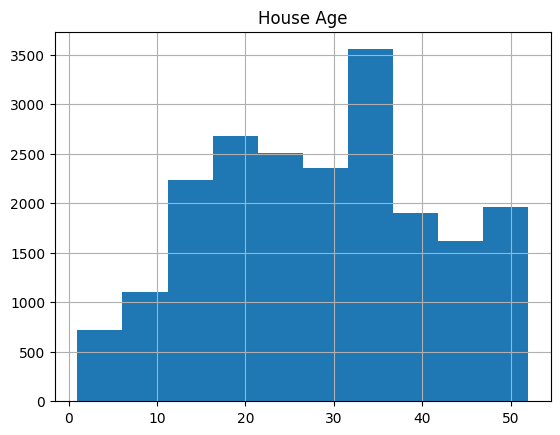

In [14]:
df['HouseAge'].hist()   #Uses matplotlib 
plt.title('House Age')
plt.show()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

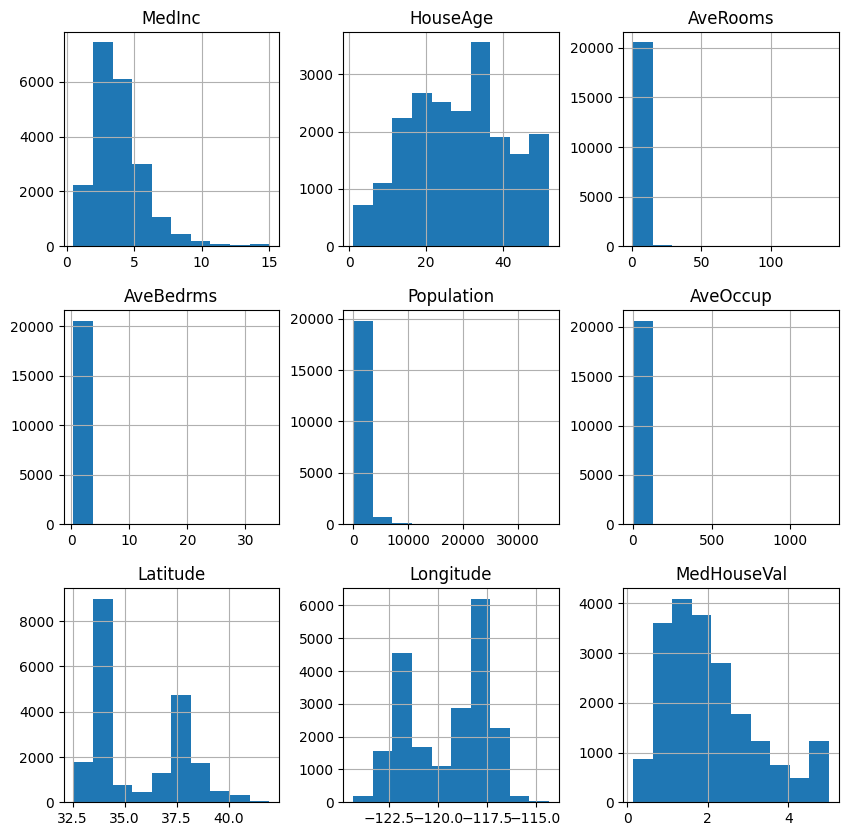

In [15]:
df.hist(figsize=[10,10]) #Histogramm of full dataframe 
plt.tight_layout

# Accessing Data

In [16]:
df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'age': [25, 30, 35, 40],
    'job': ['Engineer', 'Doctor', 'Artist', 'Teacher']
})
df

,name,age,job
0,Alice,25,Engineer
1,Bob,30,Doctor
2,Charlie,35,Artist
3,David,40,Teacher


In [17]:
df.loc[1]   # Get data from row with index 1

name       Bob
age         30
job     Doctor
Name: 1, dtype: object

In [18]:
df = df.set_index('name')
df.loc['Bob']   #Loc calls are based on the index name 

age        30
job    Doctor
Name: Bob, dtype: object

In [19]:
df.iloc[1]  #Still gets the first row ven tough index is changed 

age        30
job    Doctor
Name: Bob, dtype: object

In [20]:
df.loc['Alice', 'age']  #Selects rowe and than column 

25

In [21]:
#For a specfic value thre are better functions optimised 
df.at['Alice', 'age']
df.iat[0, 0]    #First row and first column 

25

In [22]:
# Functions can also be used to change stuff 
df.at['Alice', 'age'] = 60
df

,age,job
name,,
Alice,60,Engineer
Bob,30,Doctor
Charlie,35,Artist
David,40,Teacher


In [23]:
# Also possible for the entire row
df.loc['Alice'] = [75, 'Clerk']
df

,age,job
name,,
Alice,75,Clerk
Bob,30,Doctor
Charlie,35,Artist
David,40,Teacher


In [24]:
# ALso used to append rows 
df.loc['Max'] = [24, 'Engineer']
df

,age,job
name,,
Alice,75,Clerk
Bob,30,Doctor
Charlie,35,Artist
David,40,Teacher
Max,24,Engineer


In [25]:
# We can also do sclicing
df.iloc[0:2]

,age,job
name,,
Alice,75,Clerk
Bob,30,Doctor


In [26]:
#To get an entire column we could do 
df.loc[:,'age']

name
Alice      75
Bob        30
Charlie    35
David      40
Max        24
Name: age, dtype: int64

# Manipulating data

In [27]:
#Change entire row or columns 
df.age = df.age * 2  #Can perform arithmetic on entire column 
df

,age,job
name,,
Alice,150,Clerk
Bob,60,Doctor
Charlie,70,Artist
David,80,Teacher
Max,48,Engineer


In [28]:
#Simple function that can be applied to column 
def myfunction (x):
    if x % 3 == 0:
        return x **2
    else:
        return x//2 

In [29]:
df.age.apply(myfunction)    #Call the created function on the ages 

name
Alice      22500
Bob         3600
Charlie       35
David         40
Max         2304
Name: age, dtype: int64

In [30]:
df

,age,job
name,,
Alice,150,Clerk
Bob,60,Doctor
Charlie,70,Artist
David,80,Teacher
Max,48,Engineer


In [31]:
# Can also be done for the entire row 
df['summary'] = df.apply(lambda row: f'Age:{row["age"]}, job: {row["job"]}', axis=1)  # Creating a new column which stores an applied function to entire data frame
# axis = 1 specifies i want to do this operation row wise 
df 

,age,job,summary
name,,,
Alice,150,Clerk,"Age:150, job: Clerk"
Bob,60,Doctor,"Age:60, job: Doctor"
Charlie,70,Artist,"Age:70, job: Artist"
David,80,Teacher,"Age:80, job: Teacher"
Max,48,Engineer,"Age:48, job: Engineer"


In [32]:
# Removing column 
df = df.drop('summary', axis = 1)
df

,age,job
name,,
Alice,150,Clerk
Bob,60,Doctor
Charlie,70,Artist
David,80,Teacher
Max,48,Engineer


# Data cleaning 

In [37]:
df.at['Alice','age'] = float('nan') #Set to null value 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Alice to Max
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     4 non-null      float64
 1   job     5 non-null      object 
dtypes: float64(1), object(1)
memory usage: 292.0+ bytes


In [ ]:
df.dropna() #drop rows with Nan

,age,job
name,,
Bob,60.0,Doctor
Charlie,70.0,Artist
David,80.0,Teacher
Max,48.0,Engineer


In [39]:
df.fillna(0)    #fills nan values with zero 

,age,job
name,,
Alice,0.0,Clerk
Bob,60.0,Doctor
Charlie,70.0,Artist
David,80.0,Teacher
Max,48.0,Engineer


In [41]:
df.at['Bob', 'job'] = None
df

,age,job
name,,
Alice,NaN,Clerk
Bob,60.0,None
Charlie,70.0,Artist
David,80.0,Teacher
Max,48.0,Engineer


In [44]:
df[df.age.notna()] #Only drop one column of Nan's


,age,job
name,,
Bob,60.0,None
Charlie,70.0,Artist
David,80.0,Teacher
Max,48.0,Engineer


# Iterating over dataframes 

In [ ]:
# row wise iteration 
for i, row in df.iterrows():
    print(i) #Gives back the index 
    print(row['age']) #Gives back the series object  

Alice
nan
Bob
60.0
Charlie
70.0
David
80.0
Max
48.0


In [47]:
#Iterate over columns 
for i, col in df.items():
    print(i)   #Gives column names 
    print(col) #Gives column values 

age
name
Alice       NaN
Bob        60.0
Charlie    70.0
David      80.0
Max        48.0
Name: age, dtype: float64
job
name
Alice         Clerk
Bob            None
Charlie      Artist
David       Teacher
Max        Engineer
Name: job, dtype: object


# Filtering and Querying data 

In [ ]:
df.age > 50 #returns bolean series 

name
Alice      False
Bob         True
Charlie     True
David       True
Max        False
Name: age, dtype: bool

In [49]:
#Booleans are then used to index 
df[df.age > 50]

,age,job
name,,
Bob,60.0,None
Charlie,70.0,Artist
David,80.0,Teacher


In [50]:
df = df.reset_index()
df

,name,age,job
0,Alice,NaN,Clerk
1,Bob,60.0,None
2,Charlie,70.0,Artist
3,David,80.0,Teacher
4,Max,48.0,Engineer


In [52]:
df[df.name.str.endswith('e') & (df.age.notna())]

,name,age,job
2,Charlie,70.0,Artist


In [ ]:
df.query('age >30') # numexpr 

,name,age,job
1,Bob,60.0,None
2,Charlie,70.0,Artist
3,David,80.0,Teacher
4,Max,48.0,Engineer


# Grouping data 

In [ ]:
# Refill nan values 
df.age = df.age.fillna(20)
df.job = df.job.fillna('programmer')
df

,name,age,job
0,Alice,20.0,Clerk
1,Bob,60.0,programmer
2,Charlie,70.0,Artist
3,David,80.0,Teacher
4,Max,48.0,Engineer


In [ ]:
#data for grouping generated
df = df.set_index('name')
df = df.dropna()
df.age = df.age * 4
df.at['Alice','job'] = 'programmer'
df = df.reset_index()
df

,name,age,job
0,Alice,10.0,programmer
1,Bob,30.0,programmer
2,Charlie,35.0,Artist
3,David,40.0,Teacher
4,Max,24.0,Engineer


In [82]:
# Group by job and aggregates their ages 
df.groupby('job').agg({
    'age':'mean'
})

,age
job,
Artist,35.0
Engineer,24.0
Teacher,40.0
programmer,20.0


In [ ]:
df.loc[5] = ['Jane', 35, 'programmer'] #add a further entry

In [85]:
# Group by job and aggregates their ages 
df.groupby('job').agg({
    'age':['mean', 'min', 'max']
})


age            
            mean   min   max
job                         
Artist      35.0  35.0  35.0
Engineer    24.0  24.0  24.0
Teacher     40.0  40.0  40.0
programmer  25.0  10.0  35.0

# Sorting 

In [86]:
df.sort_values('age')

,name,age,job
0,Alice,10.0,programmer
4,Max,24.0,Engineer
1,Bob,30.0,programmer
2,Charlie,35.0,Artist
5,Jane,35.0,programmer
3,David,40.0,Teacher


# Merging, Concatenating & Joining Data

In [ ]:
#Creating two dataframe s to work with 
df1 = pd.DataFrame({
    'Item': ['A', 'B', 'C'],
    'Price':[10,20,30]
})

df2 = pd.DataFrame({
    'Item': ['D', 'E', 'F'],
    'Price':[40,50,60]
})
df1

,Item,Price
0,A,10
1,B,20
2,C,30


In [ ]:
#Stacking rows 
df3 = pd.concat([df1,df2])
df3

,Item,Price
0,A,10
1,B,20
2,C,30
0,D,40
1,E,50
2,F,60


In [91]:
#Two different dataframes 
df1 = pd.DataFrame({
    'Item': ['A','B','C'],
    'Price':[10,20,30]
})
df2 = pd.DataFrame({
    'Country':['X', 'Y','Z'],
    'Available':[True,True,False]
})

In [92]:
#Stacking columns 
pd.concat([df1,df2], axis=1) #Concatination happens by index

,Item,Price,Country,Available
0,A,10,X,True
1,B,20,Y,True
2,C,30,Z,False


In [93]:
df3 = pd.DataFrame({
    'Item': ['B','C','D'],
    'Country':['X', 'Y','Z']
})

In [94]:
df1

,Item,Price
0,A,10
1,B,20
2,C,30


In [95]:
df3

,Item,Country
0,B,X
1,C,Y
2,D,Z


In [ ]:
# We want to concatenate df1 and df3
pd.merge(df1,df3,on ='item', how='outer')

,Item,Price,Country
0,A,10.0,NaN
1,B,20.0,X
2,C,30.0,Y
3,D,NaN,Z
